# Space Travel Prediction 

In [187]:
# Load the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,RandomizedSearchCV,KFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [188]:
# Load the dataset
df=pd.read_csv("Space_Travel_data.csv")

In [189]:
# EAD (Head)
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


Conclusion=The data has been loaded properly but there are some unrequired columns like PassengerId and Name.

In [190]:
# Removing the unwanted features
df=df.drop(["PassengerId","Name"],axis=1)
df.tail()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False
8692,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,True


In [191]:
# Checking the Unique values of Cabin
df["Cabin"].unique()

array(['B/0/P', 'F/0/S', 'A/0/S', ..., 'G/1499/S', 'G/1500/S', 'E/608/S'],
      dtype=object)

Conlusion= It has many unique values so its better to drop it.

In [192]:
# Droping the feature Cabin
df=df.drop("Cabin",axis=1)

In [193]:
#EDA (Shape and Size)
print("The shape is",df.shape)
print("The size is",df.size)

The shape is (8693, 11)
The size is 95623


In [194]:
# EDA (Info)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8511 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float64
 6   FoodCourt     8510 non-null   float64
 7   ShoppingMall  8485 non-null   float64
 8   Spa           8510 non-null   float64
 9   VRDeck        8505 non-null   float64
 10  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(4)
memory usage: 687.8+ KB


Conclusion=The dtype matches with the feature data so there is no need for change of dtype and there are null values.

In [195]:
# EDA (Describe)
df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


Conclusion=There can be lot of skewness in the dataset.

In [196]:
# EDA (Skewness)
df.skew()

CryoSleep        0.591110
Age              0.419097
VIP              6.300900
RoomService      6.333014
FoodCourt        7.102228
ShoppingMall    12.627562
Spa              7.636020
VRDeck           7.819732
Transported     -0.014497
dtype: float64

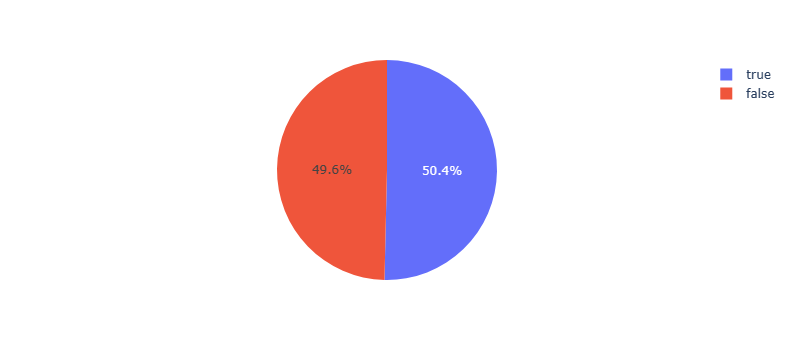

In [197]:
# EDA (Data visulization of target column)
px.pie(names=df["Transported"])

Conclusion=The dataset is not imbalanced.

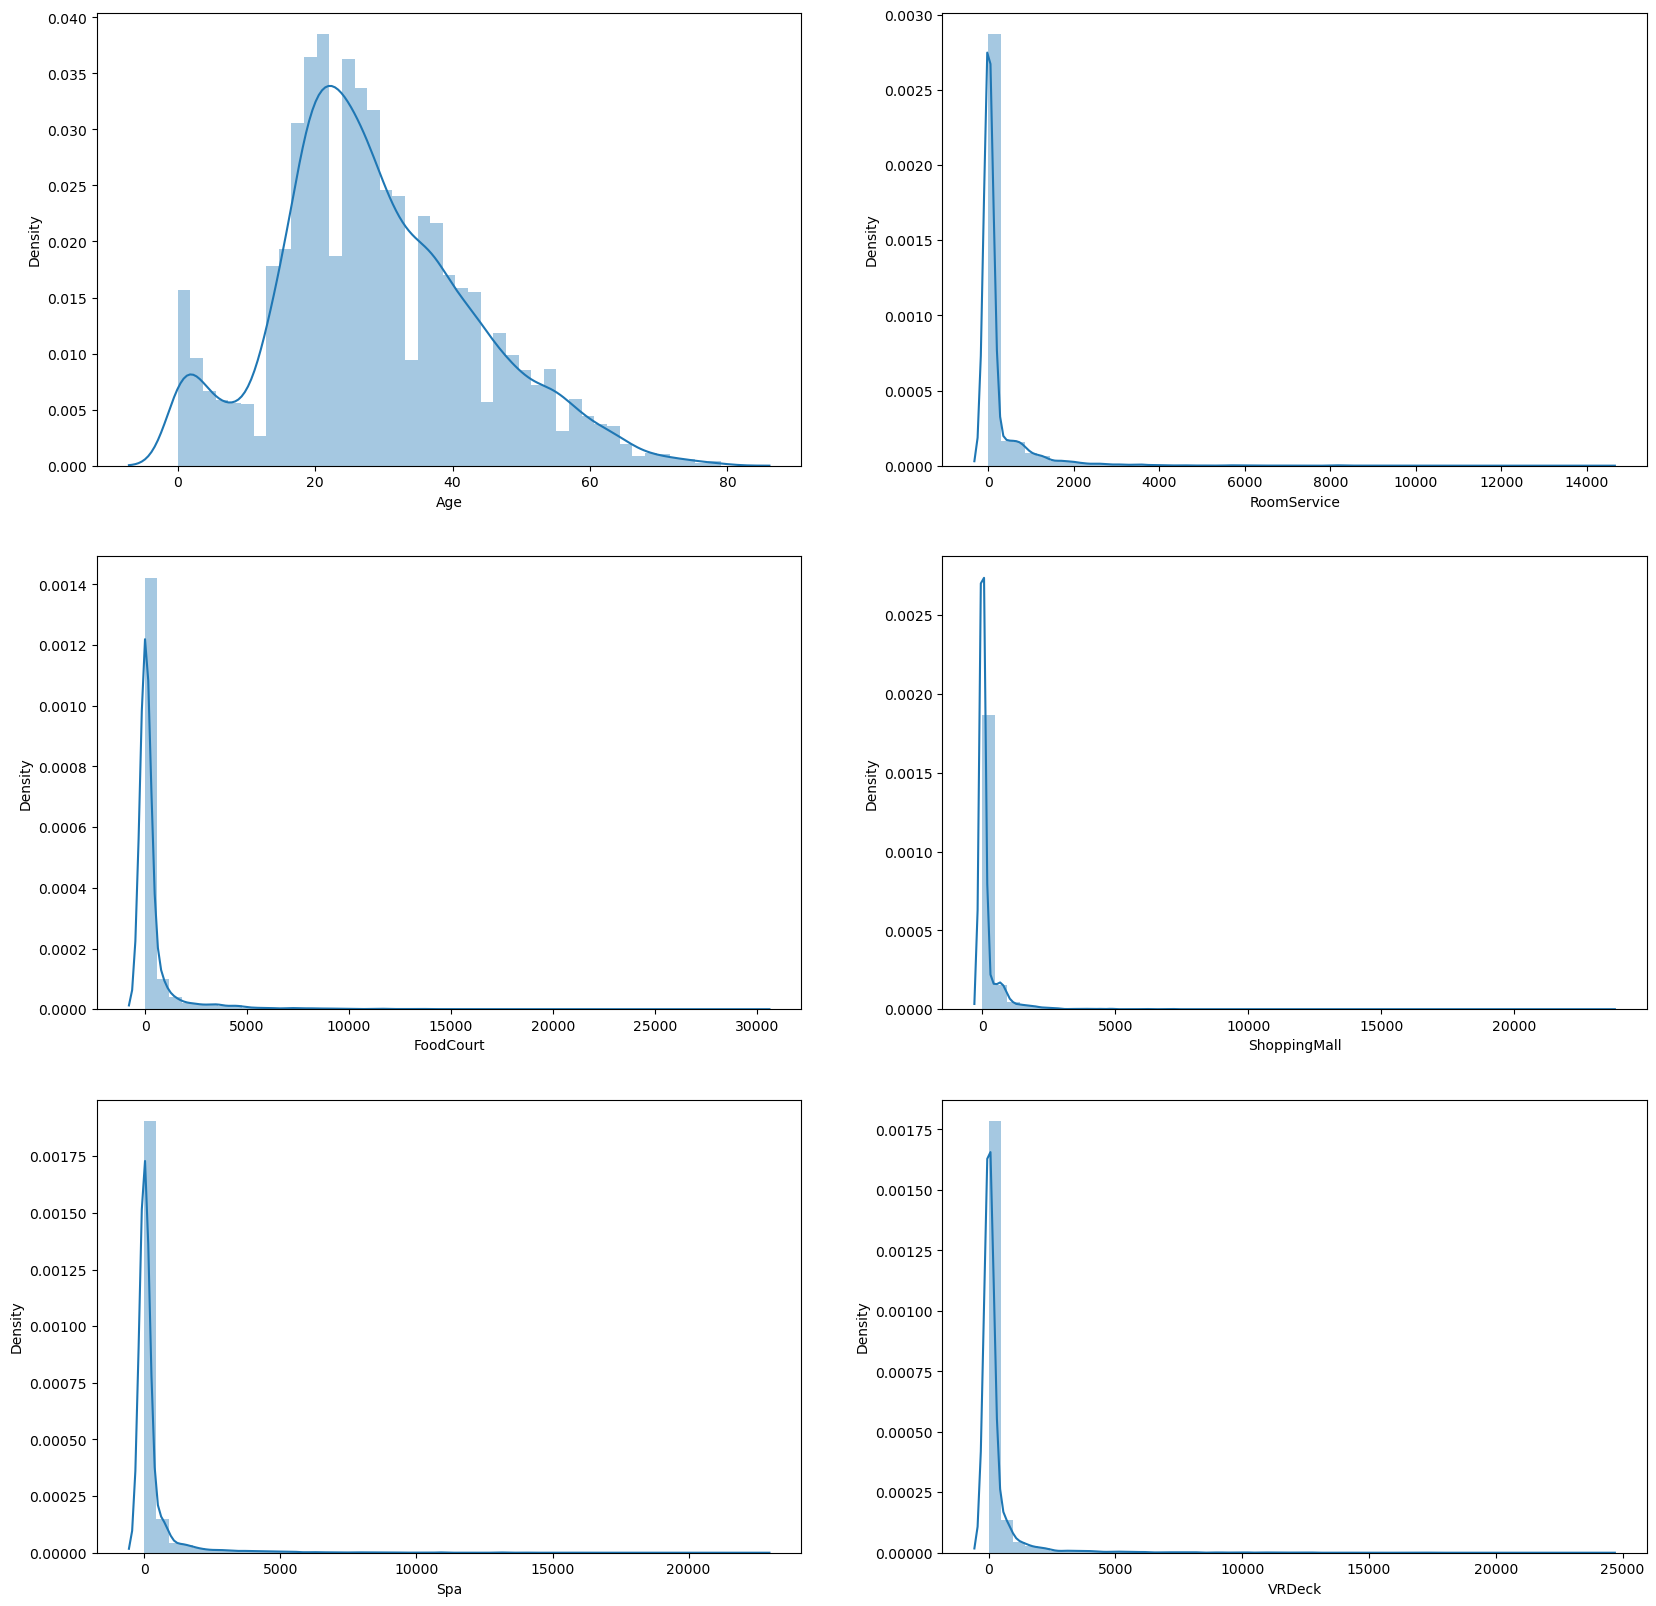

In [198]:
# EDA (Data visulization)
df_numeric=df.select_dtypes(include=np.number)
df_numeric_col=df_numeric.columns
fig,ax=plt.subplots( nrows=3,ncols=2,figsize=[20,20])
for col,sub in zip(df_numeric_col,ax.flatten()):
    sns.distplot(df[col],ax=sub)

Conclusion=Only age seems to be not skewned but all other features are left skewned.

<Axes: xlabel='HomePlanet', ylabel='Count'>

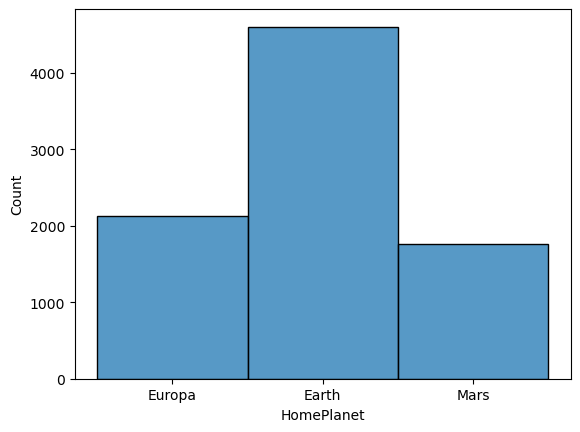

In [199]:
# EDA (Data visulization)
sns.histplot(df["HomePlanet"])

<Axes: xlabel='Destination', ylabel='Count'>

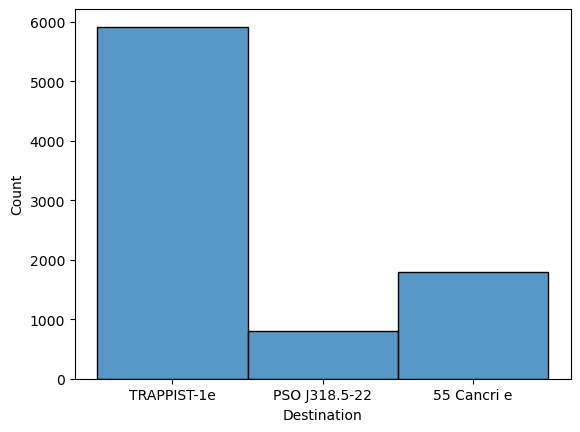

In [200]:
# EDA (Data visulization)
sns.histplot(df["Destination"])

# Treatment of Missig values.

In [201]:
# Checking the missing values
df.isnull().sum()

HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [202]:
# Treatment of missing values of Numeric cols 
for col in df_numeric:
    df[col]=df[col].fillna(df[col].mean())

In [203]:
# Treatment of missing values of Categorical cols 
df_cat=df.select_dtypes(exclude=np.number)
for col in df_cat:
    mode_col=df[col].mode()[0]
    df[col]=df[col].fillna(mode_col)

In [204]:
# Checking the missing values
df.isnull().sum()

HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

# Treament of Categorical Features

In [205]:
# Treatment of target col
df["Transported"]=df["Transported"].astype("string")
df["Transported"]=df["Transported"].map({"True":1,"False":0})
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1


In [206]:
# Treatment of other categorical features (Cyrosleep and VIP)
df["CryoSleep"]=df["CryoSleep"].astype("string")
df["VIP"]=df["VIP"].astype("string")
df["CryoSleep"]=df["CryoSleep"].map({"True":1,"False":0})
df["VIP"]=df["VIP"].map({"True":1,"False":0})
df

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,0
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,1
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0


In [207]:
# Treatment of other categorical features (Cyrosleep and VIP)
df_t=df[["HomePlanet","Destination"]]
LE=LabelEncoder()
for col in df_t:
    df[col]=LE.fit_transform(df[col])
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1


# Standardization of data 

In [208]:
SS=StandardScaler()
X=df.drop("Transported",axis=1)
y=df["Transported"]
ScaledX=SS.fit_transform(X)
ScaledX

array([[ 0.44038529, -0.73277002,  0.62054498, ..., -0.29081703,
        -0.27666342, -0.26902263],
       [-0.81725903, -0.73277002,  0.62054498, ..., -0.24896783,
         0.2115053 , -0.23019432],
       [ 0.44038529, -0.73277002,  0.62054498, ..., -0.29081703,
         5.69428913, -0.22578201],
       ...,
       [-0.81725903, -0.73277002,  0.62054498, ...,  2.84285059,
        -0.27577423, -0.26902263],
       [ 0.44038529, -0.73277002, -1.83368499, ..., -0.29081703,
         0.03722284,  2.58574044],
       [ 0.44038529, -0.73277002,  0.62054498, ..., -0.29081703,
        -0.27666342, -0.25843309]])

# Partition of Data

In [209]:
# Train Test Split
X_train,X_test,y_train,y_test=train_test_split(ScaledX,y,random_state=42,shuffle=True,stratify=y)

# Model Building 

1) Logistic Regression

2) KNN

3) Naive Bayes

4) SVM

5) Descion Tree

6) Random Forest

7) Adaboost

8) Gradeint Boost

9) XgBoost

# Logistic Regression

In [210]:
# Logistic Regression
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [211]:
# Training and testing score
print("Traning Score is",LR.score(X_train,y_train))
print("Testing Score is",LR.score(X_test,y_test))

Traning Score is 0.7861635220125787
Testing Score is 0.781048758049678


In [212]:
# Classification Report 
predict_lr=LR.predict(X_test)
print(metrics.classification_report(y_test,predict_lr))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      1079
           1       0.78      0.78      0.78      1095

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.78      2174
weighted avg       0.78      0.78      0.78      2174



# KNN 

In [213]:
# KNN
KNN=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
KNN.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean')

In [214]:
# Traning and testing score
print("Traning score is",KNN.score(X_train,y_train))
print("Testing score is",KNN.score(X_test,y_test))

Traning score is 0.8206780181009358
Testing score is 0.7621895124195032


In [215]:
# Classification Report 
predict_knn=KNN.predict(X_test)
print(metrics.classification_report(y_test,predict_knn))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76      1079
           1       0.76      0.77      0.76      1095

    accuracy                           0.76      2174
   macro avg       0.76      0.76      0.76      2174
weighted avg       0.76      0.76      0.76      2174



# Naive Bayes

In [216]:
# Naive Bayes Classifier
NB=BernoulliNB()
NB.fit(X_train,y_train)

BernoulliNB()

In [217]:
# Training and Testing Score
print("Traning score is",NB.score(X_train,y_train))
print("Testing score is",NB.score(X_test,y_test))

Traning score is 0.7562509587360025
Testing score is 0.7493100275988961


In [218]:
# Classification Report 
predict_nb=NB.predict(X_test)
print(metrics.classification_report(y_test,predict_nb))

              precision    recall  f1-score   support

           0       0.71      0.83      0.77      1079
           1       0.80      0.67      0.73      1095

    accuracy                           0.75      2174
   macro avg       0.76      0.75      0.75      2174
weighted avg       0.76      0.75      0.75      2174



# SVM

In [219]:
# SVM
SVM=SVC()
SVM.fit(X_train,y_train)

SVC()

In [220]:
# Training and Testing Score
print("Traning score is",SVM.score(X_train,y_train))
print("Testing score is",SVM.score(X_test,y_test))

Traning score is 0.7944470010737843
Testing score is 0.7750689972401104


In [221]:
# Classification Report 
predict_svm=SVM.predict(X_test)
print(metrics.classification_report(y_test,predict_svm))

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      1079
           1       0.80      0.74      0.77      1095

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.77      2174
weighted avg       0.78      0.78      0.77      2174



In [222]:
# Descion Tree
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [223]:
# Training and Testing Score
print("Traning score is",DT.score(X_train,y_train))
print("Testing score is",DT.score(X_test,y_test))

Traning score is 0.938487498082528
Testing score is 0.7286108555657773


Conclusion=There is overfitting hence prunning needs to be done.

In [238]:
# Hyperparametric Tunning
hpara={"max_depth":[2,3,4,5,6,7,8,9,10,11],"min_samples_split":list(range(2,100)),"min_samples_leaf":list(range(2,100))}
random=RandomizedSearchCV(estimator=DT,param_distributions=hpara,n_iter=50)
random.fit(X_train,y_train)
random.best_estimator_

DecisionTreeClassifier(max_depth=8, min_samples_leaf=19, min_samples_split=39)

In [239]:
# Desecion Tree after Hyperparametric tunning
DT=DecisionTreeClassifier(max_depth=8, min_samples_leaf=19, min_samples_split=39)
DT.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=19, min_samples_split=39)

In [240]:
# Training and Testing Score
print("Traning score is",DT.score(X_train,y_train))
print("Testing score is",DT.score(X_test,y_test))

Traning score is 0.799202331645958
Testing score is 0.7884084636614536


In [241]:
# Classification Report 
predict_dt=DT.predict(X_test)
print(metrics.classification_report(y_test,predict_dt))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1079
           1       0.77      0.82      0.80      1095

    accuracy                           0.79      2174
   macro avg       0.79      0.79      0.79      2174
weighted avg       0.79      0.79      0.79      2174



[Text(0.6429721030042919, 0.9444444444444444, 'CryoSleep <= 0.316\ngini = 0.5\nsamples = 6519\nvalue = [3236, 3283]\nclass = False'),
 Text(0.4511802575107296, 0.8333333333333334, 'RoomService <= 0.185\ngini = 0.445\nsamples = 4246\nvalue = [2825, 1421]\nclass = True'),
 Text(0.286480686695279, 0.7222222222222222, 'Spa <= 0.015\ngini = 0.479\nsamples = 3167\nvalue = [1911, 1256]\nclass = True'),
 Text(0.1684549356223176, 0.6111111111111112, 'VRDeck <= 0.044\ngini = 0.499\nsamples = 2271\nvalue = [1176, 1095]\nclass = True'),
 Text(0.09871244635193133, 0.5, 'FoodCourt <= 0.899\ngini = 0.483\nsamples = 1604\nvalue = [652, 952]\nclass = False'),
 Text(0.06866952789699571, 0.3888888888888889, 'ShoppingMall <= 1.799\ngini = 0.493\nsamples = 1476\nvalue = [651, 825]\nclass = False'),
 Text(0.034334763948497854, 0.2777777777777778, 'Spa <= -0.244\ngini = 0.498\nsamples = 1358\nvalue = [635, 723]\nclass = False'),
 Text(0.017167381974248927, 0.16666666666666666, 'VRDeck <= -0.175\ngini = 0.489

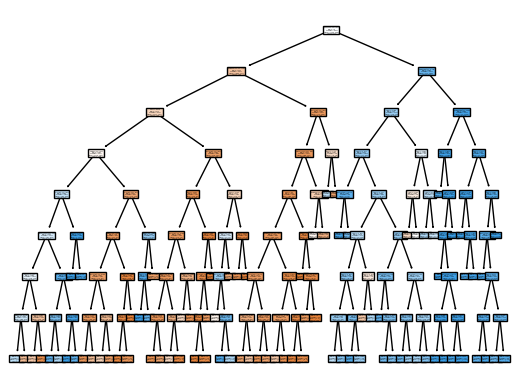

In [246]:
# Plot of Tree
tree.plot_tree(DT,class_names=["True","False"],feature_names=X.columns,filled=True)

# Random Forest

In [243]:
# Random Forest
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

RandomForestClassifier()

In [251]:
# Training and Testing Score
print("Traning score is",RF.score(X_train,y_train))
print("Testing score is",RF.score(X_test,y_test))

Traning score is 0.938487498082528
Testing score is 0.7787488500459981


Conclusion=The model is overfitting.

In [253]:
# Hyperparametric Tunning
hparas={"n_estimators":list(range(50,150)),"max_depth":[2,3,4,5,6,7,8,9,10,11],"min_samples_split":list(range(2,100)),"min_samples_leaf":list(range(2,100))}
randoms=RandomizedSearchCV(estimator=RF,param_distributions=hparas,n_iter=20)
randoms.fit(X_train,y_train)
randoms.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_leaf=31, min_samples_split=54,
                       n_estimators=108)

In [256]:
# RF after hyperparameter Tunning
RF=RandomForestClassifier(max_depth=10, min_samples_leaf=31, min_samples_split=54,
                       n_estimators=108)
RF.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=31, min_samples_split=54,
                       n_estimators=108)

In [258]:
# Training and Testing Score
print("Traning score is",RF.score(X_train,y_train))
print("Testing score is",RF.score(X_test,y_test))

Traning score is 0.8062586286240221
Testing score is 0.796228150873965


In [257]:
# Classification Report 
predict_rf=RF.predict(X_test)
print(metrics.classification_report(y_test,predict_rf))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1079
           1       0.78      0.82      0.80      1095

    accuracy                           0.80      2174
   macro avg       0.80      0.80      0.80      2174
weighted avg       0.80      0.80      0.80      2174



# Adaboost


In [249]:
# Adaboost
AB=AdaBoostClassifier()
AB.fit(X_train,y_train)

AdaBoostClassifier()

In [250]:
# Traning and Testing Score
print("Traning score is",AB.score(X_train,y_train))
print("Testing score is",AB.score(X_test,y_test))

Traning score is 0.7927596257094647
Testing score is 0.7879484820607175


In [255]:
# Classification Report 
predict_ab=AB.predict(X_test)
print(metrics.classification_report(y_test,predict_ab))

              precision    recall  f1-score   support

           0       0.79      0.78      0.78      1079
           1       0.78      0.80      0.79      1095

    accuracy                           0.79      2174
   macro avg       0.79      0.79      0.79      2174
weighted avg       0.79      0.79      0.79      2174



# GradenttBoost

In [259]:
# Gradient Boost
GB=GradientBoostingClassifier()
GB.fit(X_train,y_train)

GradientBoostingClassifier()

In [260]:
# Traning and Testing Score
print("Traning score is",GB.score(X_train,y_train))
print("Testing score is",GB.score(X_test,y_test))

Traning score is 0.8094799815922687
Testing score is 0.7989880404783809


In [261]:
# Classification Report 
predict_gb=GB.predict(X_test)
print(metrics.classification_report(y_test,predict_gb))

              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1079
           1       0.78      0.83      0.81      1095

    accuracy                           0.80      2174
   macro avg       0.80      0.80      0.80      2174
weighted avg       0.80      0.80      0.80      2174



# XgBoost

In [263]:
# Extreme Gradinet Boost
XGB=XGBClassifier()
XGB.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [264]:
# Traning and Testing Score
print("Traning score is",XGB.score(X_train,y_train))
print("Testing score is",XGB.score(X_test,y_test))

Traning score is 0.8906273968400061
Testing score is 0.7805887764489421


In [265]:
# Classification Report 
predict_xgb=XGB.predict(X_test)
print(metrics.classification_report(y_test,predict_xgb))

              precision    recall  f1-score   support

           0       0.79      0.77      0.78      1079
           1       0.78      0.79      0.78      1095

    accuracy                           0.78      2174
   macro avg       0.78      0.78      0.78      2174
weighted avg       0.78      0.78      0.78      2174

